In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from utils import label_map_util

from utils import visualization_utils as vis_util

utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 107

In [3]:
# This is needed to display the images.
%matplotlib inline

In [4]:
od_inference_dirs = ['od_1252812627_1fps', 'od_1252812923_1fps', 'od_169182094_1fps', 'od_169182098_1fps', 'od_279703428_1fps', 'od_279703885_1fps', 'od_942334491_1fps', 'od_942334494_1fps', 'od_3438636448_1fps', 'od_3477876483_1fps', 'od_3423612893_1fps', 'od_3497684122_1fps', 'od_3498539801_1fps', 'od_3498532459_1fps', 'od_3491078546_1fps', 'od_3582306776_1fps', 'od_3468314939_1fps']

labels = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11]

label2name = {0:'Game of Throne', 1: 'Friends', 2: 'Sopranos', 3: 'Breaking Bad', 4: 'Africa\'s Hunters', 5: 'Africa\'s Wild', 6: 'Big Bang Theory', 7: '16 and Pregnant', 8: 'Teen Mom', 9: '4th & Forever', 10: '24/7 College', 11: 'Camelot'}

In [5]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
NUM_CLASSES = 547

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
with open('/root/openimage/f_score_v5.pickle', 'rb') as handle:
    maxF_dict = pickle.load(handle)

In [7]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict

def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
            if prob > maxF_dict[c]['Threshold']:
                class_counts[c] += 1
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path=''):
    results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
    for elem in listofTuples[0:topN] :
#         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
        print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))




In [8]:
results = {}

ID,frequency (%),Name
47,20.42,Arm
37,15.27,Hair
32,10.21,Human body
2,8.96,Clothing
39,8.68,Head
45,5.52,Mammal
7,4.86,Woman
1,3.87,Person
12,3.03,Girl
3,2.82,Man
4,2.61,Face
23,1.76,Table
29,1.29,Dress
18,0.98,Furniture
103,0.95,Couch
55,0.93,Nose
6,0.62,Plant
62,0.53,Eye
64,0.46,Mouth
9,0.45,Building


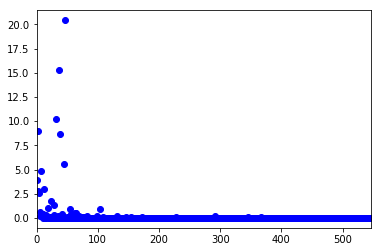

In [9]:
od_dir = 'od_169182098_1fps' #f2
results[od_dir] = {}
results[od_dir]['Raw'] = read_frames_todict('/root/ampvideo_inference/'+od_dir)
results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
plot_class(od_dir, results, NUM_CLASSES,20)

## process all

In [10]:
inference_dir = '/root/ampvideo_inference/'
for od_dir in od_inference_dirs:

    results[od_dir] = {}
    results[od_dir]['Raw'] = read_frames_todict(inference_dir+od_dir)
    results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
#     plot_class(od_dir, results, NUM_CLASSES,20)

## select some TV shows
friends, game of T, 'Africa's Hunters

In [11]:
od_inference_dirs_select = []
labels_select = []
for idx, label in enumerate(labels): 
    if label in [0,1,4]:
        labels_select.append(label)
        od_inference_dirs_select.append(od_inference_dirs[idx])

# Prepare for model

In [12]:
corpus = []
for idx, od_dir in enumerate(od_inference_dirs_select): 
    corpus.append(results[od_inference_dirs_select[0]]['Words'].items())


In [13]:
results[od_inference_dirs_select[0]]['Words']

{1: 3800,
 2: 3592,
 3: 1313,
 4: 2521,
 5: 1563,
 6: 480,
 7: 2583,
 8: 878,
 9: 149,
 10: 12,
 11: 29,
 12: 894,
 13: 378,
 14: 0,
 15: 23,
 16: 34,
 17: 3,
 18: 38,
 19: 77,
 20: 16,
 21: 5,
 22: 131,
 23: 15,
 24: 7,
 25: 2,
 26: 8,
 27: 7,
 28: 250,
 29: 362,
 30: 31,
 31: 2,
 32: 7635,
 33: 0,
 34: 5,
 35: 10,
 36: 0,
 37: 16111,
 38: 6,
 39: 13156,
 40: 0,
 41: 1,
 42: 2,
 43: 0,
 44: 0,
 45: 11931,
 46: 1,
 47: 7601,
 48: 0,
 49: 246,
 50: 1,
 51: 2,
 52: 18,
 53: 2,
 54: 0,
 55: 5393,
 56: 0,
 57: 10,
 58: 3,
 59: 0,
 60: 0,
 61: 6,
 62: 3607,
 63: 2,
 64: 4005,
 65: 1,
 66: 1,
 67: 0,
 68: 30,
 69: 3,
 70: 116,
 71: 2,
 72: 2,
 73: 15,
 74: 0,
 75: 44,
 76: 115,
 77: 0,
 78: 0,
 79: 1,
 80: 0,
 81: 78,
 82: 1,
 83: 1,
 84: 0,
 85: 1,
 86: 1,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 30,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 5,
 101: 0,
 102: 0,
 103: 10,
 104: 23,
 105: 0,
 106: 0,
 107: 0,
 108: 1,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 152,
 11

In [14]:
results[od_inference_dirs_select[0]]['Words'].items()

[(1, 3800),
 (2, 3592),
 (3, 1313),
 (4, 2521),
 (5, 1563),
 (6, 480),
 (7, 2583),
 (8, 878),
 (9, 149),
 (10, 12),
 (11, 29),
 (12, 894),
 (13, 378),
 (14, 0),
 (15, 23),
 (16, 34),
 (17, 3),
 (18, 38),
 (19, 77),
 (20, 16),
 (21, 5),
 (22, 131),
 (23, 15),
 (24, 7),
 (25, 2),
 (26, 8),
 (27, 7),
 (28, 250),
 (29, 362),
 (30, 31),
 (31, 2),
 (32, 7635),
 (33, 0),
 (34, 5),
 (35, 10),
 (36, 0),
 (37, 16111),
 (38, 6),
 (39, 13156),
 (40, 0),
 (41, 1),
 (42, 2),
 (43, 0),
 (44, 0),
 (45, 11931),
 (46, 1),
 (47, 7601),
 (48, 0),
 (49, 246),
 (50, 1),
 (51, 2),
 (52, 18),
 (53, 2),
 (54, 0),
 (55, 5393),
 (56, 0),
 (57, 10),
 (58, 3),
 (59, 0),
 (60, 0),
 (61, 6),
 (62, 3607),
 (63, 2),
 (64, 4005),
 (65, 1),
 (66, 1),
 (67, 0),
 (68, 30),
 (69, 3),
 (70, 116),
 (71, 2),
 (72, 2),
 (73, 15),
 (74, 0),
 (75, 44),
 (76, 115),
 (77, 0),
 (78, 0),
 (79, 1),
 (80, 0),
 (81, 78),
 (82, 1),
 (83, 1),
 (84, 0),
 (85, 1),
 (86, 1),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 30),
 (92, 0),
 (93,

In [15]:
category_index

{1: {'id': 1, 'name': u'Person'},
 2: {'id': 2, 'name': u'Clothing'},
 3: {'id': 3, 'name': u'Man'},
 4: {'id': 4, 'name': u'Face'},
 5: {'id': 5, 'name': u'Tree'},
 6: {'id': 6, 'name': u'Plant'},
 7: {'id': 7, 'name': u'Woman'},
 8: {'id': 8, 'name': u'Vehicle'},
 9: {'id': 9, 'name': u'Building'},
 10: {'id': 10, 'name': u'Land vehicle'},
 11: {'id': 11, 'name': u'Footwear'},
 12: {'id': 12, 'name': u'Girl'},
 13: {'id': 13, 'name': u'Animal'},
 14: {'id': 14, 'name': u'Car'},
 15: {'id': 15, 'name': u'Food'},
 16: {'id': 16, 'name': u'Wheel'},
 17: {'id': 17, 'name': u'Flower'},
 18: {'id': 18, 'name': u'Furniture'},
 19: {'id': 19, 'name': u'Window'},
 20: {'id': 20, 'name': u'House'},
 21: {'id': 21, 'name': u'Boy'},
 22: {'id': 22, 'name': u'Fashion accessory'},
 23: {'id': 23, 'name': u'Table'},
 24: {'id': 24, 'name': u'Glasses'},
 25: {'id': 25, 'name': u'Suit'},
 26: {'id': 26, 'name': u'Auto part'},
 27: {'id': 27, 'name': u'Bird'},
 28: {'id': 28, 'name': u'Sports equipmen

In [16]:
# # List of the strings that is used to add correct label for each box.
# PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
# NUM_CLASSES = 547

# label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
# categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
# category_index = label_map_util.create_category_index(categories)
id2word = {}
for key, value in category_index.items():
    id2word[key] = category_index[key]['name']

In [17]:
id2word

{1: u'Person',
 2: u'Clothing',
 3: u'Man',
 4: u'Face',
 5: u'Tree',
 6: u'Plant',
 7: u'Woman',
 8: u'Vehicle',
 9: u'Building',
 10: u'Land vehicle',
 11: u'Footwear',
 12: u'Girl',
 13: u'Animal',
 14: u'Car',
 15: u'Food',
 16: u'Wheel',
 17: u'Flower',
 18: u'Furniture',
 19: u'Window',
 20: u'House',
 21: u'Boy',
 22: u'Fashion accessory',
 23: u'Table',
 24: u'Glasses',
 25: u'Suit',
 26: u'Auto part',
 27: u'Bird',
 28: u'Sports equipment',
 29: u'Dress',
 30: u'Dog',
 31: u'Carnivore',
 32: u'Human body',
 33: u'Jeans',
 34: u'Musical instrument',
 35: u'Drink',
 36: u'Boat',
 37: u'Hair',
 38: u'Tire',
 39: u'Head',
 40: u'Cat',
 41: u'Watercraft',
 42: u'Chair',
 43: u'Bike',
 44: u'Tower',
 45: u'Mammal',
 46: u'Skyscraper',
 47: u'Arm',
 48: u'Toy',
 49: u'Sculpture',
 50: u'Invertebrate',
 51: u'Microphone',
 52: u'Poster',
 53: u'Insect',
 54: u'Guitar',
 55: u'Nose',
 56: u'Hat',
 57: u'Tableware',
 58: u'Door',
 59: u'Bicycle wheel',
 60: u'Sunglasses',
 61: u'Baked g

In [18]:
# corpus [[(0, 4),(id, counts),  ]...]
# id2word {id:'name', 0: u'name 1',}
# labels [0,1,2,2...] int
# label2name {0: showname} string
# od_inference_dirs ['od_3438636448_1fps'...] string
# model = LdaModel(
#     corpus=corpus,
#     id2word=id2word,
#     chunksize=chunksize,
#     alpha='auto',
#     eta='auto',
#     iterations=iterations,
#     num_topics=num_topics,
#     passes=passes,
#     eval_every=eval_every
# )

## run LDA

In [19]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 3
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [20]:
top_topics = model.top_topics(corpus) #, num_words=20)
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)


Average topic coherence: 0.0000.
[([(0.0018252152, u'Head'),
   (0.0018251997, u'Hair'),
   (0.0018251553, u'Mammal'),
   (0.0018251545, u'Arm'),
   (0.0018251509, u'Human body'),
   (0.0018251018, u'Nose'),
   (0.0018250847, u'Person'),
   (0.0018250823, u'Eye'),
   (0.0018250762, u'Clothing'),
   (0.0018250734, u'Mouth'),
   (0.0018250705, u'Woman'),
   (0.0018250635, u'Face'),
   (0.0018250502, u'Man'),
   (0.0018250496, u'Tree'),
   (0.0018250431, u'Girl'),
   (0.0018250425, u'Vehicle'),
   (0.0018250401, u'Watercraft'),
   (0.0018250401, u'Porch'),
   (0.0018250401, u'Sombrero'),
   (0.0018250401, u'Dumbbell')],
  1.0000889005818406e-12),
 ([(0.17844664, u'Hair'),
   (0.14571698, u'Head'),
   (0.13214882, u'Mammal'),
   (0.08456615, u'Human body'),
   (0.08418957, u'Arm'),
   (0.059733685, u'Nose'),
   (0.044360146, u'Mouth'),
   (0.04208956, u'Person'),
   (0.039951883, u'Eye'),
   (0.039785743, u'Clothing'),
   (0.028610019, u'Woman'),
   (0.02792331, u'Face'),
   (0.017312465, 

In [21]:
print(len(corpus))

5


## visualization

## force to use dictionary

In [22]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [23]:
corpus_strings = []
for corpus_1 in corpus:
    corpus_string = []
    for item in corpus_1:
        name = id2word[item[0]]
        counts = item[1]
        for _ in range(counts):
            corpus_string.append(name)
    corpus_strings.append(corpus_string)

In [24]:
train_texts = corpus_strings
dictionary = Dictionary(train_texts)
corpus2 = [dictionary.doc2bow(text) for text in train_texts]

In [32]:

ldamodel = LdaModel(corpus=corpus2, num_topics=3, id2word=dictionary)


In [33]:
# for text in corpus_strings:
# #     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
#     _ = ldamodel.get_document_topics(bow)
#     print(_)

In [37]:
for bow in corpus2:
#     text = corpus_strings[0]
#     bow = dictionary.doc2bow(text)
    _ = ldamodel.get_document_topics(bow)
    print(_)

[(0, 0.34780017), (1, 0.45043474), (2, 0.20176505)]
[(0, 0.37302083), (1, 0.44958273), (2, 0.17739643)]
[(0, 0.3465995), (1, 0.45660388), (2, 0.19679663)]
[(0, 0.37722498), (1, 0.43398488), (2, 0.18879014)]
[(0, 0.42682365), (1, 0.4206967), (2, 0.15247965)]


In [27]:
## mulit core
# ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, num_topics=20, passes = 100)


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


In [38]:
# import gensim
# from gensim import corpora, models
pyLDAvis.gensim.prepare(ldamodel, corpus2, dictionary)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      45.933693        1       1  0.006000 -0.000485
0      36.821251        1       2 -0.003831 -0.002383
2      17.245054        1       3 -0.002170  0.002867, topic_info=    Category          Freq               Term         Total  loglift  logprob
34   Default  65993.000000               Head  65993.000000  30.0000  30.0000
52   Default  80707.000000               Hair  80707.000000  29.0000  29.0000
126  Default  58768.000000             Mammal  58768.000000  28.0000  28.0000
32   Default  38439.000000         Human body  38439.000000  27.0000  27.0000
10   Default  13837.000000              Woman  13837.000000  26.0000  26.0000
3    Default  18679.000000                Eye  18679.000000  25.0000  25.0000
86   Default  19449.000000             Person  19449.000000  24.0000  24.0000
116  Default   7283.000000                Man   7283.000000  23.0000  23.0000
23   Default  37098.000000                Arm  37098.000000  22.0000  22.0000
123  Default  25377.000000               Nose  25377.000000  21.0000  21.0000
84   Default  12465.000000               Face  12465.000000  20.0000  20.0000
47   Default   7945.000000               Tree   7945.000000  19.0000  19.0000
139  Default  17590.000000           Clothing  17590.000000  18.0000  18.0000
112  Default  19434.000000              Mouth  19434.000000  17.0000  17.0000
138  Default   4604.000000               Girl   4604.000000  16.0000  16.0000
26   Default   4343.000000            Vehicle   4343.000000  15.0000  15.0000
107  Default   2480.000000              Plant   2480.000000  14.0000  14.0000
69   Default   1904.000000             Animal   1904.000000  13.0000  13.0000
22   Default   1827.000000              Dress   1827.000000  12.0000  12.0000
88   Default   1251.000000   Sports equipment   1251.000000  11.0000  11.0000
90   Default   1271.000000          Sculpture   1271.000000  10.0000  10.0000
72   Default   1365.000000              Beard   1365.000000   9.0000   9.0000
1    Default    596.000000              Horse    596.000000   8.0000   8.0000
16   Default    754.000000           Building    754.000000   7.0000   7.0000
14   Default    761.000000                Ear    761.000000   6.0000   6.0000
59   Default    658.000000  Fashion accessory    658.000000   5.0000   5.0000
101  Default    399.000000             Window    399.000000   4.0000   4.0000
98   Default    243.000000         Houseplant    243.000000   3.0000   3.0000
79   Default    577.000000               Hand    577.000000   2.0000   2.0000
73   Default    159.000000                Jug    159.000000   1.0000   1.0000
..       ...           ...                ...           ...      ...      ...
10    Topic3   3284.952637              Woman  13837.695312   0.3196  -3.1650
34    Topic3  12432.310547               Head  65993.296875   0.0884  -1.8341
52    Topic3  13854.519531               Hair  80707.203125  -0.0046  -1.7258
3     Topic3   3774.861572                Eye  18679.957031   0.1586  -3.0260
32    Topic3   6700.730469         Human body  38439.851562   0.0108  -2.4522
126   Topic3   9224.457031             Mammal  58768.300781  -0.0941  -2.1325
86    Topic3   3554.166260             Person  19449.306641   0.0580  -3.0863
47    Topic3   1537.207153               Tree   7945.974121   0.1149  -3.9244
23    Topic3   5356.997559                Arm  37098.781250  -0.1775  -2.6760
84    Topic3   2113.920654               Face  12465.114258  -0.0167  -3.6058
138   Topic3    910.269165               Girl   4604.479492   0.1366  -4.4484
139   Topic3   2636.004395           Clothing  17590.142578  -0.1404  -3.3851
123   Topic3   3227.574951               Nose  25377.943359  -0.3045  -3.1826
107   Topic3    487.078705              Plant   2480.782715   0.1297  -5.0737
26    Topic3    760.559021            Vehicle   4343.907715   0.0152  -4.6281
112   Topic3   2521.5